# The Sparks Foundation

# Data Science and Business Analytics Internship- GRIP May'21

## Author: saravanavel v



## TSF Task 7 : Stock Market Prediction using Numerical and Textual Analysis
### (Level - Advanced)


##  *Objective: Creating a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines <br>*
● Stock to analyze and predict - S&P BSE SENSEX <br>
● Download the historical stock prices from  www.finance.yahoo.com <br>
● Download the textual (news) data from https://bit.ly/36fFPI6 <br>
● Using Python for separate analysis and then combine the findings to create a hybrid model <br>


● Step 1:- Importing the libraries<br>
● Step 2:- Import Dataset

● Download the textual (news) data from https://bit.ly/36fFPI6 <br>
● Use either R or Python, or both for separate analysis and then 
combine the findings to create a hybrid model <br>


#### Step 1:- Importing the libraries


In [1]:
# import general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing libraries reqyired for Textual Analysis
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [3]:
# importing libraries required for Historical Analysis
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [4]:
# importing libraries required for prediction
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Step 2:- Import Dataset

In [5]:
# Load the first dataset
# headlines data
headlines_df= pd.read_csv("C:/GRIP/india-news-headlines.csv",error_bad_lines=False,encoding='latin-1')
headlines_df.head(-5) 

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424057,20201231,india,50 NRIs reach Singhu; offer help to farmers
3424058,20201231,city.amritsar,Navjot Singh Sidhu tweets apology; says 'wore ...
3424059,20201231,city.bengaluru,Azim Premji organisation's name misused to che...
3424060,20201231,india,Get govt nod to probe officials: MP to agencies


In [6]:
# Load the second dataset
# Here I am fetching data from Yahoo Finance Website
import yfinance as yf

# SENSEX (S&P BSE SENSEX)
msft = yf.Ticker("^BSESN")

# get stock info
print(msft.info)

# get historical market data
hisdf = msft.history(period="15y")
hisdf.head(-5)

{'exchange': 'BSE', 'shortName': 'S&P BSE SENSEX', 'exchangeTimezoneName': 'Asia/Kolkata', 'exchangeTimezoneShortName': 'IST', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '19800000', 'quoteType': 'INDEX', 'symbol': '^BSESN', 'messageBoardId': 'finmb_INDEXBSESN', 'market': 'in_market', 'previousClose': 52198.51, 'regularMarketOpen': 52494.56, 'twoHundredDayAverage': 50431.973, 'trailingAnnualDividendYield': None, 'payoutRatio': None, 'volume24Hr': None, 'regularMarketDayHigh': 52867.26, 'navPrice': None, 'averageDailyVolume10Day': 12671, 'totalAssets': None, 'regularMarketPreviousClose': 52198.51, 'fiftyDayAverage': 52528.86, 'trailingAnnualDividendRate': None, 'open': 52494.56, 'toCurrency': None, 'averageVolume10days': 12671, 'expireDate': None, 'yield': None, 'algorithm': None, 'dividendRate': None, 'exDividendDate': None, 'beta': None, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 52471.23, 'priceHint': 2, 'currency': 'INR', 'regularMarketVolume': 0, 'la

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-07-24,9881.030273,10252.750000,9875.349609,10215.370117,20600,0,0
2006-07-25,10351.750000,10443.049805,10323.769531,10415.610352,18400,0,0
2006-07-26,10465.339844,10648.769531,10362.610352,10617.269531,19600,0,0
2006-07-27,10671.769531,10762.669922,10589.679688,10741.589844,20800,0,0
2006-07-28,10787.650391,10787.650391,10603.830078,10680.230469,21000,0,0
...,...,...,...,...,...,...,...
2021-07-08,53065.691406,53103.031250,52428.839844,52568.941406,6400,0,0
2021-07-09,52508.238281,52555.730469,52228.011719,52386.191406,6400,0,0
2021-07-12,52634.328125,52700.511719,52208.960938,52372.691406,24900,0,0


 #### Step 3:- Pre-Processing the Data:
 
 ##### Headlines Dataset

In [8]:
# headlines data
headlines_df.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [9]:
#Shape of Dataset
headlines_df.shape

(3424067, 3)

In [10]:
#checking duplicates
headlines_df.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [11]:
# drop duplicates
headlines_df.drop_duplicates(inplace=True)

In [12]:
#drop headlines_category
headlines_df= headlines_df.drop(columns=['headline_category'])

In [13]:
headlines_df.head()

,publish_date,headline_text
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic


In [14]:
# remove special charecters from headline_text
# creating a function 
def remove_special_chars(text):
    
    result = ""
    
    for i in text:
        if i.isalnum() or i == ' ':
            result  = result + i
        else:
            result = result + ""
    return result.strip()

In [15]:
# applying the function to the dataset
headlines_df['headline_text']=headlines_df['headline_text'].apply(remove_special_chars)


In [16]:
#Renaming headlines coloumns
headlines_df.rename(columns={'publish_date':'date','headline_text':'headline'},inplace=True)

In [17]:
#applying date and time in a a Format
headlines_df['date']=pd.to_datetime(headlines_df['date'],format='%Y%m%d')


In [18]:
headlines_df.head()

,date,headline
0,2001-01-02,Status quo will not be disturbed at Ayodhya sa...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,Americas unwanted heading for India
3,2001-01-02,For bigwigs it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [19]:
# Group all the headlines for each day

headlines_df['headline']= headlines_df.groupby(['date']).transform(lambda x : ' '.join(x))
headlines_df= headlines_df.drop_duplicates()
headlines_df.reset_index(inplace=True, drop=True)

In [20]:
headlines_df.head()

,date,headline
0,2001-01-02,Status quo will not be disturbed at Ayodhya sa...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...


In [21]:
# Shape of Dataset
headlines_df.shape

(7262, 2)

### Textual Analysis

In [22]:
# functions to get subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [23]:
# applying subjectivity and polarity to the columns
headlines_df['Subjectivity']=headlines_df['headline'].apply(getSubjectivity)
headlines_df['Polarity']= headlines_df['headline'].apply(getPolarity)

In [24]:
headlines_df.head()

,date,headline,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya sa...,0.293056,0.193519
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.481895,0.086052
3,2001-01-05,Light combat craft takes India into club class...,0.465542,0.257415
4,2001-01-06,Light combat craft takes India into club class...,0.464935,0.219481


Text(0.5, 1.0, 'Polarity Score')

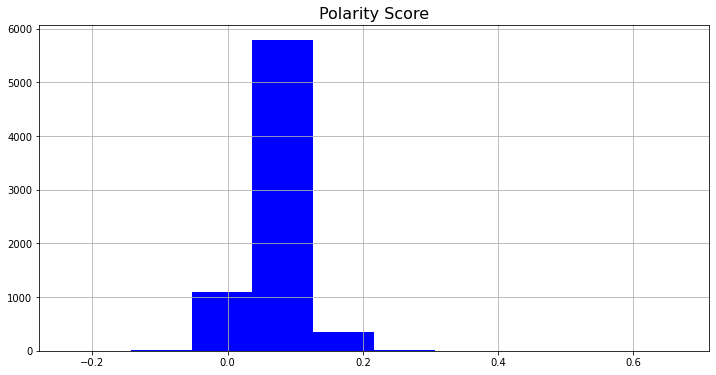

In [25]:
#Plotting polarity score
plt.figure(figsize= (12,6))
headlines_df['Polarity'].hist(color= 'blue')
plt.title('Polarity Score',fontsize=16)

Text(0.5, 1.0, 'Subjeectivity Score')

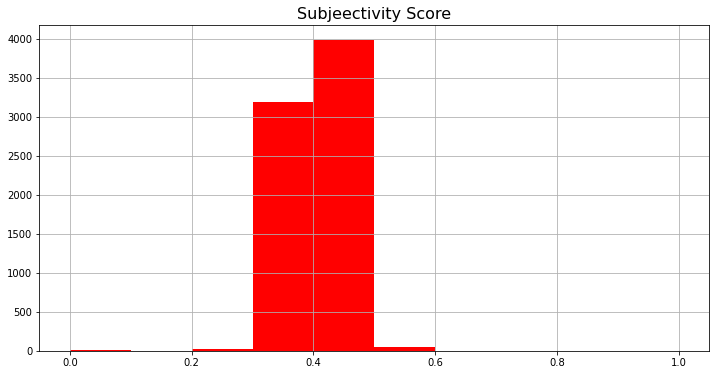

In [26]:
#plotting Subjeectivity Score
plt.figure(figsize= (12,6))
headlines_df['Subjectivity'].hist(color= 'red')
plt.title('Subjeectivity Score',fontsize=16)

### Sentimental Analysis of news headlines 

In [27]:
# importing Sentimental Analysis
sia= SentimentIntensityAnalyzer()

In [28]:
headlines_df['Compound']=[sia.polarity_scores(v)['compound'] for v in headlines_df['headline']]
headlines_df['Negative']=[sia.polarity_scores(v)['neg'] for v in headlines_df['headline']]
headlines_df['Neutral']=[sia.polarity_scores(v)['neu'] for v in headlines_df['headline']]
headlines_df['Positive']=[sia.polarity_scores(v)['pos'] for v in headlines_df['headline']]

In [29]:
headlines_df.head()

,date,headline,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya sa...,0.293056,0.193519,-0.9839,0.142,0.790,0.068
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.1779,0.121,0.767,0.112
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.481895,0.086052,0.9294,0.097,0.790,0.113
3,2001-01-05,Light combat craft takes India into club class...,0.465542,0.257415,0.8689,0.123,0.723,0.154
4,2001-01-06,Light combat craft takes India into club class...,0.464935,0.219481,-0.5574,0.165,0.702,0.133


In [30]:
#Shape of Dataset
headlines_df.shape

(7262, 8)

In [31]:

headlines_df.rename(columns= {'date':'Date'}, inplace=True)

##### Historical Dataset

In [32]:
hisdf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-07-24,9881.030273,10252.750000,9875.349609,10215.370117,20600,0,0
2006-07-25,10351.750000,10443.049805,10323.769531,10415.610352,18400,0,0
2006-07-26,10465.339844,10648.769531,10362.610352,10617.269531,19600,0,0
2006-07-27,10671.769531,10762.669922,10589.679688,10741.589844,20800,0,0
2006-07-28,10787.650391,10787.650391,10603.830078,10680.230469,21000,0,0


In [33]:
#Selecting column except Adj Close
hisdf= hisdf[['High','Low','Open','Close','Volume']]

In [34]:
# Total Size of Second Dataset
len(hisdf)

3674

In [35]:
# Check for duplicated values
hisdf.isnull().sum()

High      0
Low       0
Open      0
Close     0
Volume    0
dtype: int64

In [36]:
hisdf.describe()

,High,Low,Open,Close,Volume
count,3674.000000,3674.000000,3674.000000,3674.000000,3.674000e+03
mean,24946.648701,24609.877453,24803.931510,24775.617378,1.032020e+05
std,10050.970608,9976.487744,10030.601960,10012.934389,1.233967e+06
min,8259.219727,7697.390137,8103.750000,8160.399902,0.000000e+00
25%,17232.308105,17013.884277,17127.592285,17122.519531,1.050000e+04
50%,21108.465820,20850.229492,20951.370117,20930.745117,1.420000e+04
75%,32011.082031,31658.899902,31886.303223,31803.075195,1.980000e+04
max,53290.808594,52997.089844,53244.398438,53158.851562,3.181510e+07


In [37]:
# Total Size of Second Dataset
len(hisdf)

3674

Text(0, 0.5, 'BSESN')

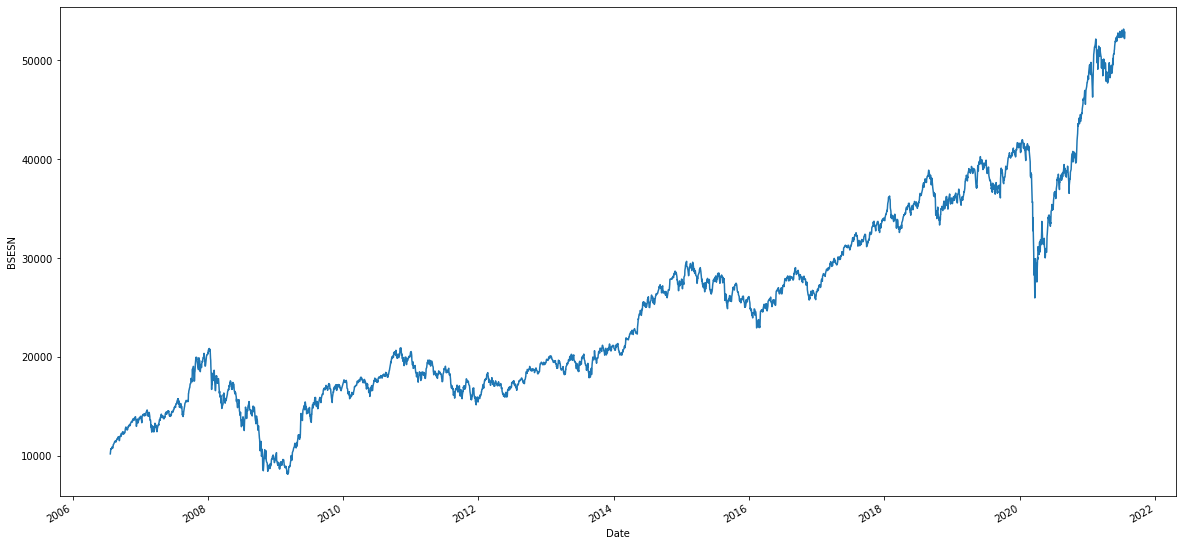

In [38]:
# Figure plot
plt.figure(figsize=(20,10))
hisdf['Close'].plot()
plt.ylabel('BSESN')

Text(0.5, 1.0, 'Closing Price')

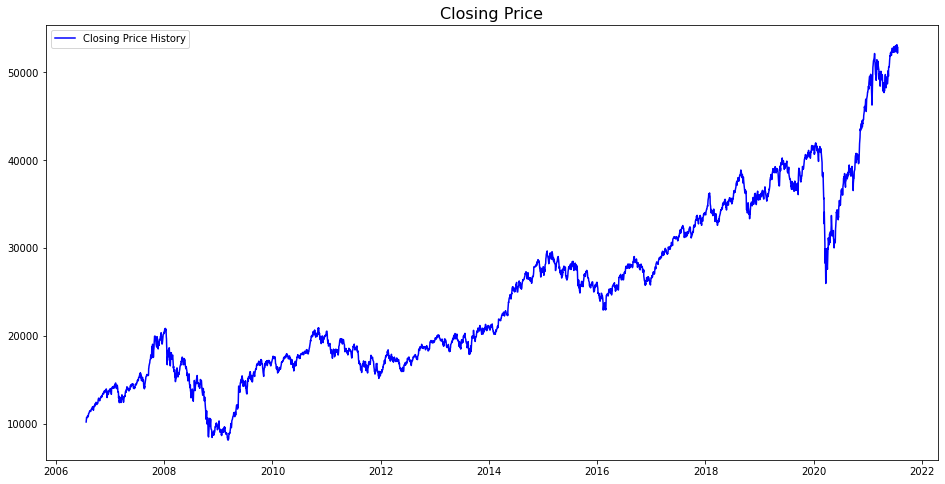

In [39]:
# Closing Price Graph
plt.figure(figsize=(16,8))
plt.plot(hisdf['Close'], label= 'Closing Price History', color='blue')
plt.legend()
plt.title("Closing Price", fontsize=16)

Text(0.5, 1.0, 'Moving Average')

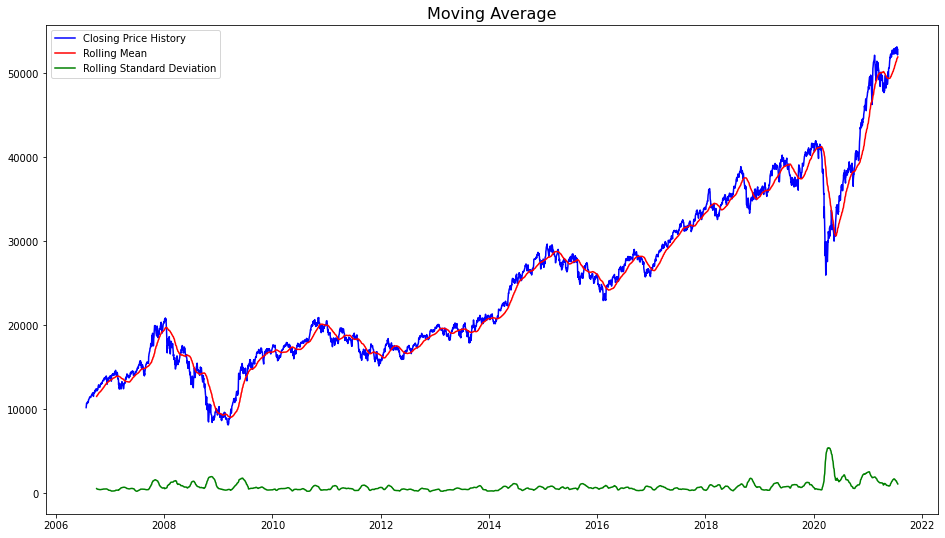

In [40]:
# Plotting Moving average
close= hisdf['Close']

ma= close.rolling(window=50).mean()
std=close.rolling(window=50).std()

plt.figure(figsize=(16,9))
plt.plot(hisdf['Close'], label= 'Closing Price History', color='blue')
plt.plot(ma, label= 'Rolling Mean', color='red')
plt.plot(std, label= 'Rolling Standard Deviation', color='green')
plt.legend()

plt.title("Moving Average", fontsize=16)

Text(0.5, 1.0, 'Returns')

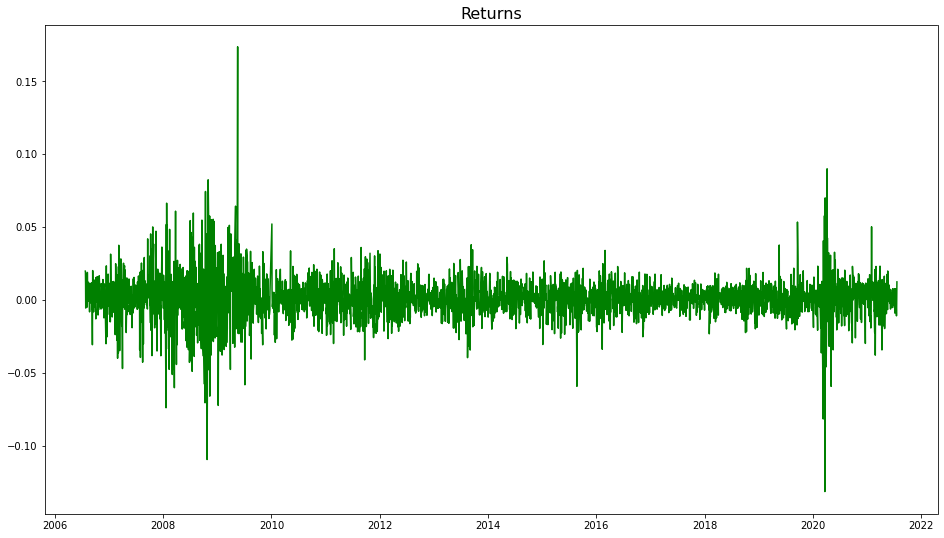

In [41]:
# Plotting Returns

returns= close/close.shift(1)-1

plt.figure(figsize=(16,9))
plt.plot(returns, label='Return',color='green')
plt.title("Returns", fontsize=16)

In [42]:
# Stationarity Test

# defining the function

def test_stationarity(timeseries):
    rolmean= timeseries.rolling(20).mean()
    rolstd= timeseries.rolling(20).std()
    
    # Plotting Rolling Statistics
    
    plt.figure(figsize=(16,9))
    plt.plot(timeseries, color='blue', label='original')
    plt.plot(rolmean, color='red', label='rolling mean')
    plt.plot(rolstd, color='black', label='rolling standard deviation')
    plt.legend()
    plt.title("Rolling Mean and Standard Deviation", fontsize=16)
    plt.show(block=False)
    
    print('Results of dickey fuller test')
    result = adfuller(timeseries, autolag = 'AIC')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
            print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
           print("Weak evidence against null hypothesis, time series is non-stationary ")
    
    

In [43]:
#splitting the data
train, test = hisdf[:1218], hisdf[1218:len(hisdf)]

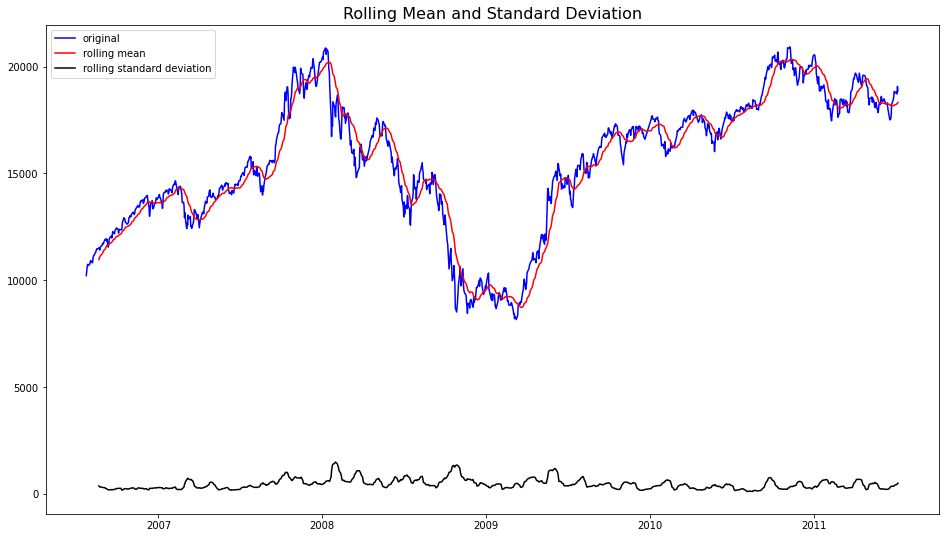

Results of dickey fuller test
ADF Test Statistic : -1.8892033347174992
p-value : 0.33715712449611845
#Lags Used : 1
Number of Observations Used : 1216
Weak evidence against null hypothesis, time series is non-stationary 


In [44]:
# applying stationarity test on train close data
test_stationarity(train['Close'])

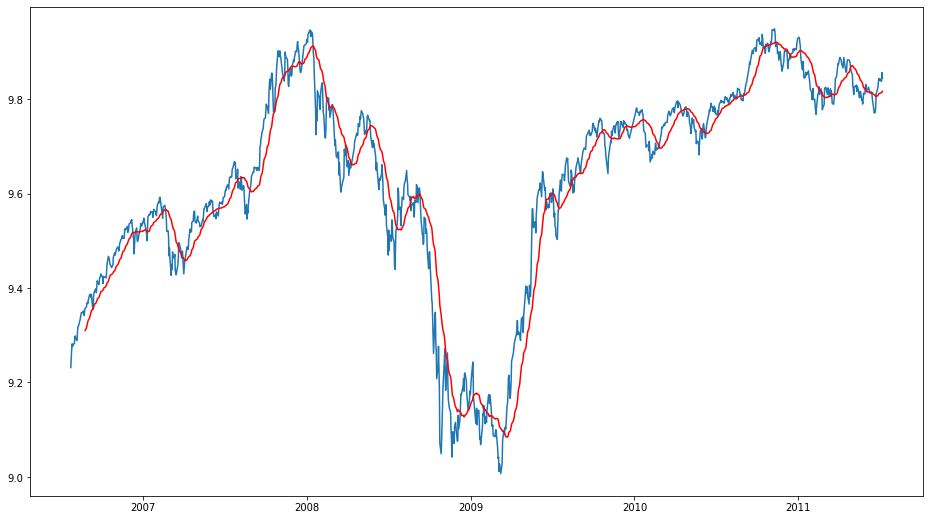

In [45]:
train_log= np.log(train['Close'])
test_log= np.log(test['Close'])

mav= train_log.rolling(24).mean()
plt.figure(figsize=(16,9))
plt.plot(train_log)
plt.plot(mav, color='red')

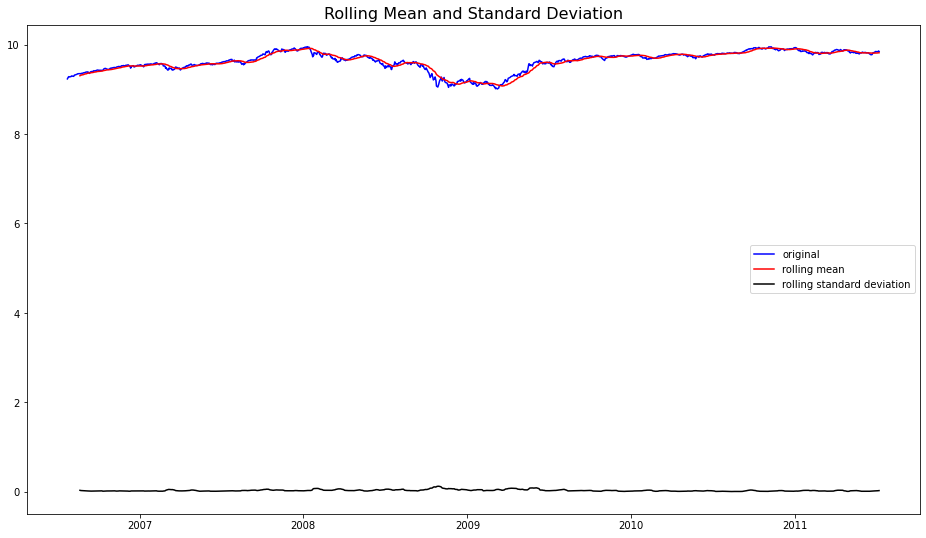

Results of dickey fuller test
ADF Test Statistic : -1.6993766088502518
p-value : 0.4314336953350055
#Lags Used : 5
Number of Observations Used : 1212
Weak evidence against null hypothesis, time series is non-stationary 


In [46]:
train_log.dropna(inplace=True)
test_log.dropna(inplace=True)

test_stationarity(train_log)

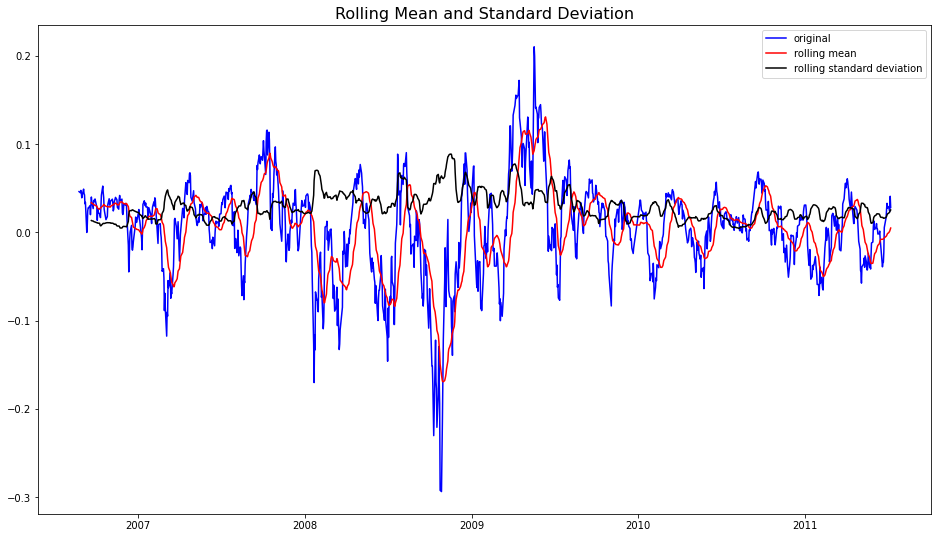

Results of dickey fuller test
ADF Test Statistic : -6.722448022698812
p-value : 3.4556476576367033e-09
#Lags Used : 1
Number of Observations Used : 1193
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [47]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

test_stationarity(train_log_diff)

##### Training the historical model

In [51]:
#using auto arima to make predictions using log data

from pmdarima import auto_arima


model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(n_periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6202.648, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6199.599, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6206.324, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6207.024, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6200.736, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6205.905, Time=0.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-6206.496, Time=0.62 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6204.621, Time=1.53 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-6208.328, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-6207.151, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-6207.682, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-6207.595, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-6205.831, Time=0.55 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 6.154 seconds


Text(0, 0.5, 'Actual Stock Price')

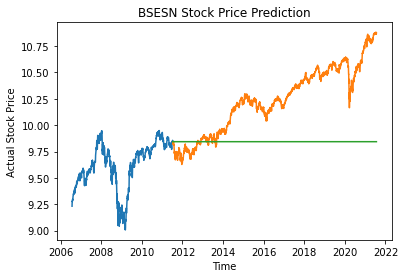

In [52]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

##### Error Calculation

In [53]:
#Calculating error
rms = np.sqrt(mean_squared_error(test_log,predictions))
print("RMSE : ", rms)

RMSE :  0.5034574278119495


#### Step 4:- Merge the Historical and Textual Data to create hybrid model

In [55]:
df_merge= pd.merge(headlines_df, hisdf, how='inner',on='Date')
df_merge

,Date,headline,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,High,Low,Open,Close,Volume
0,2006-07-24,In china women have longer life China to launc...,0.414015,0.063093,-0.9935,0.153,0.732,0.115,10252.750000,9875.349609,9881.030273,10215.370117,20600
1,2006-07-25,Hindujas buy out Ivecos 15 stake in Leyland US...,0.434027,0.047883,-0.9972,0.169,0.729,0.102,10443.049805,10323.769531,10351.750000,10415.610352,18400
2,2006-07-26,Viewpoint War terror and mankind Readerspeak T...,0.402315,0.051869,-0.9993,0.211,0.692,0.096,10648.769531,10362.610352,10465.339844,10617.269531,19600
3,2006-07-27,Indian autos make it big in Brighton These tea...,0.357547,0.010554,-0.9994,0.219,0.670,0.111,10762.669922,10589.679688,10671.769531,10741.589844,20800
4,2006-07-28,IIMA to appraise plan ICICI Bank may offer Isp...,0.383665,0.102481,-0.9952,0.165,0.714,0.121,10787.650391,10603.830078,10787.650391,10680.230469,21000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2020-12-24,How to set the mood for sex during cold winter...,0.391801,0.049680,-0.9991,0.096,0.836,0.068,47053.398438,46539.019531,46743.488281,46973.539062,13700
3535,2020-12-28,Horoscope Today 28 December 2020 Check astrolo...,0.412283,0.068677,-0.9998,0.142,0.765,0.093,47406.718750,47148.238281,47153.589844,47353.750000,9600
3536,2020-12-29,Man recovers charred remains of thief from his...,0.423628,0.062355,-0.9999,0.153,0.751,0.096,47714.550781,47361.898438,47466.621094,47613.078125,12800
3537,2020-12-30,Numerology Readings 30 December 2020 Predictio...,0.439721,0.041033,-0.9999,0.145,0.769,0.086,47807.851562,47358.359375,47789.031250,47746.218750,15600


#### Step 5:- Creating Dataset for model training

In [56]:
df_final= df_merge[['Close','Subjectivity', 'Polarity','Compound','Negative','Neutral','Positive']]
df_final

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,10215.370117,0.414015,0.063093,-0.9935,0.153,0.732,0.115
1,10415.610352,0.434027,0.047883,-0.9972,0.169,0.729,0.102
2,10617.269531,0.402315,0.051869,-0.9993,0.211,0.692,0.096
3,10741.589844,0.357547,0.010554,-0.9994,0.219,0.670,0.111
4,10680.230469,0.383665,0.102481,-0.9952,0.165,0.714,0.121
...,...,...,...,...,...,...,...
3534,46973.539062,0.391801,0.049680,-0.9991,0.096,0.836,0.068
3535,47353.750000,0.412283,0.068677,-0.9998,0.142,0.765,0.093
3536,47613.078125,0.423628,0.062355,-0.9999,0.153,0.751,0.096
3537,47746.218750,0.439721,0.041033,-0.9999,0.145,0.769,0.086


#### Step 6:- Normalize Data

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()

df= pd.DataFrame(scaler.fit_transform(df_final))
df.columns= df_final.columns
df.index= df_final.index

In [59]:
df.head()


,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.051905,0.464297,0.336172,0.00325,0.422222,0.471264,0.361702
1,0.056963,0.535376,0.294219,0.00140,0.511111,0.459770,0.292553
2,0.062056,0.422740,0.305214,0.00035,0.744444,0.318008,0.260638
3,0.065196,0.263731,0.191264,0.00030,0.788889,0.233716,0.340426
4,0.063647,0.356496,0.444806,0.00240,0.488889,0.402299,0.393617


In [60]:
X= df.drop('Close',axis=1)
X

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.464297,0.336172,0.00325,0.422222,0.471264,0.361702
1,0.535376,0.294219,0.00140,0.511111,0.459770,0.292553
2,0.422740,0.305214,0.00035,0.744444,0.318008,0.260638
3,0.263731,0.191264,0.00030,0.788889,0.233716,0.340426
4,0.356496,0.444806,0.00240,0.488889,0.402299,0.393617
...,...,...,...,...,...,...
3534,0.385397,0.299177,0.00045,0.105556,0.869732,0.111702
3535,0.458147,0.351571,0.00010,0.361111,0.597701,0.244681
3536,0.498440,0.334136,0.00005,0.422222,0.544061,0.260638
3537,0.555601,0.275328,0.00005,0.377778,0.613027,0.207447


In [61]:
y= df['Close']
y

0       0.051905
1       0.056963
2       0.062056
3       0.065196
4       0.063647
          ...   
3534    0.980354
3535    0.989958
3536    0.996508
3537    0.999871
3538    1.000000
Name: Close, Length: 3539, dtype: float64

#### Step 7:-  Splitting the Data 

In [62]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=0)


#### Step 8:- Deploying Different models 

##### Applying Random Forest Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred= rf.predict(X_test)
print('Mean Squared Error: ',mean_squared_error(y_pred, y_test))

Mean Squared Error:  0.027066627194830502


##### Applying DecisionTreeRegressor 

In [64]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred= dt.predict(X_test)
print('Mean Squared Error: ',mean_squared_error(y_pred, y_test))


Mean Squared Error:  0.053066469051211894


##### Applying AdaBoost Regressor


In [65]:
from sklearn.ensemble import AdaBoostRegressor
adb= AdaBoostRegressor()
adb.fit(X_train,y_train)
y_pred= adb.predict(X_test)
print('Mean Squared Error: ',mean_squared_error(y_pred, y_test))

Mean Squared Error:  0.0358116868534475


##### Applying LGBMRegressor

In [67]:
import lightgbm
gbm= lightgbm.LGBMRegressor()
gbm.fit(X_train, y_train)
y_pred= gbm.predict(X_test)
print('Mean Squared Error: ',mean_squared_error(y_pred, y_test))

Mean Squared Error:  0.026494436769731036


##### Applying XGBRegressor 

In [68]:
pip install xgboost

  Using cached xgboost-1.4.2-py3-none-win_amd64.whl (97.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [69]:
import xgboost
xgb= xgboost.XGBRegressor()
xgb.fit(X_train, y_train)
y_pred= xgb.predict(X_test)
print('Mean Squared Error: ',mean_squared_error(y_pred, y_test))

Mean Squared Error:  0.029304489873418722


### Conclusion:
##### RandomForestRegressor Model :- Mean Squared Error:  0.027066627194830502
##### DecisionTreeRegressor Model :- Mean Squared Error: 0.053066469051211894
##### AdaBoostRegressor Model :-Mean Squared Error:  0.0358116868534475
##### LGBM Model :-Mean Squared Error:   0.026494436769731036
##### XGBoost Model :-Mean Squared Error:  0.029304489873418722

#### The best performing model is RandomForestRegressor